# Perjalanan dan Kondisi Cuaca

Zuber adalah sebuah perusahaan berbagi tumpangan (ride-sharing) baru yang diluncurkan di Chicago.

Kita ingin memahami preferensi penumpang dan dampak faktor eksternal terhadap perjalanan, sehingga kita perlu menemukan pola pada informasi yang tersedia.

Kita akan mempelajari basis data, menganalisis data dari kompetitor, dan menguji hipotesis tentang pengaruh cuaca terhadap frekuensi perjalanan.

**KONTEN**

* [Pendahuluan]
* [Tahap 1. Eksplorasi Data]
    * [1.1 Inisialisasi]
    * [1.2 Memuat Data]
    * [1.3 Mempersiapkan Data]
    * [1.4 Kesimpulan dan Langkah-Langkah Selanjutnya]
* [Tahap 2. Pra-pemrosesan Data]   
    * [2.1 Mengatasi Duplikat]
    * [2.2 Memperbaiki Tipe Data]
    * [2.3 Kesimpulan dan Langkah-Langkah Selanjutnya]
* [Tahap 3. Analisa Data]
    * [3.1 10 Wilayah Teratas yang Dijadikan Sebagai Titik Pengantaran]
    * [3.2 10 Perusahaan Teratas Berdasarkan Jumlah Pengantaran]
    * [3.3 Kesimpulan dan Langkah Selanjutnya] 
* [Tahap 4. Menguji Hipotesis]
    * [4.1 Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan]
* [Kesimpulan Umum]

## Pendahuluan 

Dalam proyek kali ini, kita akan mempelajari basis data, menganalisis data dari kompetitor, dan menguji hipotesis tentang pengaruh cuaca terhadap frekuensi perjalanan, pada sebuah perusahaan berbagi tumpangan (ride-sharing) baru yang diluncurkan di Chicago, yaitu Zuber.

### Tujuan:

Mempelajari preferensi penumpang dan dampak faktor eksternal terhadap sebuah perjalanan.

Menguji hipotesis:

Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan.

### Tahapan
Tahap pertama, kita memerlukan informasi mengenai informasi perjalanan dan juga data mengenai cuaca.
Basis data yang memuat informasi perjalanan taksi di Chicago terbagi dalam beberapa tabel:

    * Tabel `neighborhoods`: data terkait wilayah di kota Chicago
    * Tabel `cabs`: data terkait taksi
    * Tabel `trips`: data terkait perjalanan
    * Tabel `weather_records`: data terkait cuaca

Karena kita tidak memiliki informasi mengenai data cuaca, maka kita perlu melakukan *scraping* data. Informasi data cuaca di Chicago pada bulan November 2017 berasal dari situs web: https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html.

Tahap selanjutnya, kita perlu mempelajari data yang berasal dari situs web, mengimpor file, dan mempelajari isi datanya. Kita perlu memeriksa data tersebut terlebih dahulu sebelum menguji hipotesis. Kita akan mengevaluasi kualitas data dan melihat apakah masalahnya signifikan. Kemudian, selama pra-pemrosesan data, kita akan mencoba mengatasi masalah yang muncul pada data tersebut, seperti nilai yang hilang, duplikasi, dan sebagainya. Terakhir, kita akan menguji hipotesis dan menarik kesimpulan berdasarkan data yang sudah diproses.
 
Proyek ini akan terdiri dari empat tahap:
 1. Ikhtisar Data
 2. Pra-pemrosesan Data
 3. Analisa Data
 4. Pengujian hipotesis

## Eksplorasi Data

### Inisialisasi 

In [1]:
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

### Memuat Data 

Kita sudah melakukan pengumpulan sebagian data di tahap pertama, dimana terdapat informasi perjalanan taksi dan juga data mengenai cuaca di kota Chicago pada bulan November 2017. Sehingga saat ini, kita memiliki dua dataset.

In [2]:
company_df = pd.read_csv('/datasets/project_sql_result_01.csv')

In [3]:
trip_df = pd.read_csv('/datasets/project_sql_result_04.csv')

### Mempersiapkan Data

Basis data yang memuat informasi perjalanan taksi di Chicago:

**Tabel neighborhoods: data terkait wilayah di kota Chicago**

name: nama wilayah

neighborhood_id: kode wilayah


**Tabel cabs: data terkait taksi**

cab_id: kode kendaraan

vehicle_id: ID teknis kendaraan

company_name: nama perusahaan yang memiliki kendaraan


**Tabel trips: data terkait perjalanan**

trip_id: kode perjalanan

cab_id: kode kendaraan yang beroperasi

start_ts: tanggal dan waktu perjalanan dimulai (waktu dibulatkan dalam satuan jam)

end_ts: tanggal dan waktu perjalanan berakhir (waktu dibulatkan dalam satuan jam)

duration_seconds: durasi perjalanan dalam satuan detik

distance_miles: jarak perjalanan dalam satuan mil

pickup_location_id: kode wilayah penjemputan

dropoff_location_id: kode wilayah pengantaran



**Tabel weather_records: data terkait cuaca**

record_id: kode pencatatan cuaca

ts: tanggal dan waktu saat pencatatan cuaca dilakukan (waktu dibulatkan dalam satuan jam)

temperature: suhu saat pencatatan cuaca dilakukan

description: deskripsi singkat tentang kondisi cuaca, seperti "light rain" (hujan ringan) atau "scattered clouds" (berawan).

Deskripsi data untuk kedua dataset yang kita miliki adalah:

**Dataset pertama: `project_sql_result_01.csv.`**

File ini memuat data berikut:

company_name: nama perusahaan taksi

trips_amount: jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017.

**Dataset kedua: `project_sql_result_04.csv.`**

File ini memuat data berikut:

dropoff_location_name: nama wilayah di Chicago tempat perjalanan berakhir

average_trips: jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017.

In [4]:
company_df.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
company_df.shape

(64, 2)

In [7]:
company_df.isna().sum()

company_name    0
trips_amount    0
dtype: int64

Dataset pertama, memiliki 64 baris dan 2 kolom. 

In [8]:
trip_df.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [9]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [10]:
trip_df.shape

(94, 2)

In [11]:
trip_df.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

Dataset kedua memiliki 94 baris dan 2 kolom.

### Kesimpulan dan Langkah Selanjutnya

Kita memiliki 2 dataset dengan format file csv, dimana dataset pertama memiliki 64 baris dan 2 kolom, sedangkan dataset kedua memiliki 94 baris dan 2 kolom.

Dataset pertama berisi informasi mengenai perjalanan dari perusahaan taksi dan dataset kedua berisi informasi rata-rata jumlah perjalanan yang berakhir di setiap wilayah tertentu.

Dataset pertama tidak memiliki masalah, tidak ada nilai yang hilang dan tipe data kolom sudah sesuai, namun perlu dilakukan pengecekan apakah terdapat duplikasi data atau tidak.

Dataset kedua juga tidak memiliki nilai yang hilang, namun sepertinya tipe data untuk kolom `average_trips` sebaiknya dirubah menjadi integer, mengingat kolom tersebut berisi rata-rata jumlah perjalanan yang tidak mungkin bernilai float.

Langkah yang akan dilakukan pada tahap pra-pemrosesan data:

1. Mengecek apakah ada data duplikat pada kedua dataset.
2. Mengganti tipe data kolom `average_trips` pada dataset kedua, dari float menjadi integer dengan pembulatan nilai ke atas.


## Pra-Pemrosesan Data

Pada tahap sebelumnya, kita sudah melihat bahwa masih terdapat masalah pada dataset yang kita miliki. Melalui tahap pra-pemrosesan data, kita akan coba mengatasi masalah tersebut.

### Mengatasi duplikat

In [12]:
company_df.duplicated().sum()

0

In [13]:
trip_df.duplicated().sum()

0

Tidak terdapat data yang terduplikasi pada kedua dataset yang kita miliki.

### Memperbaiki Tipe Data

Seperti dijelaskan sebelumnya, pada dataset kedua, kita mendapati salah satu kolomnya, yaitu `average_trips` tipe datanya adalah float. Sebaiknya tipe data kolom tersebut adalah integer, karena jumlah rata-rata perjalanan tidak mungkin bernilai float.

In [14]:
trip_df['average_trips'] = trip_df['average_trips'].apply(np.ceil).astype('int')

In [15]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [16]:
trip_df.head()

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547


Tipe data kolom `average_trips` sudah kita perbaiki.

### Kesimpulan dan Langkah Selanjutnya

Pada tahap pra-pemrosesan data, kita sudah mencoba mengatasi masalah yang ada, sehingga didapatkan kesimpulan:

1. Tidak ada data duplikat pada kedua dataset yang kita miliki.

2. Tipe data kolom `average_trips` pada dataset kedua yang sebelumnya berupa float, sudah diperbaiki menjadi integer.

Dengan demikian, dataset yang kita miliki sudah bersih dan siap dianalisa ke tahap selanjutnya.

## Analisa Data

Setelah tahap pra-pemrosesan data selesai, kita siap untuk mulai menganalisis data yang kita miliki.

Pertama, kita akan mengidentifikasi 10 wilayah teratas yang dijadikan sebagai titik pengantaran dan juga perusahaan taksi dan jumlah perjalanannya. 
Kemudian, kita akan menarik kesimpulan berdasarkan analisa data yang kita lakukan.

### 10 Wilayah Teratas yang Dijadikan Sebagai Titik Pengantaran

In [17]:
top_ten_area = trip_df.sort_values('average_trips', ascending=False).head(10)
top_ten_area

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1365
9,Sheffield & DePaul,1260


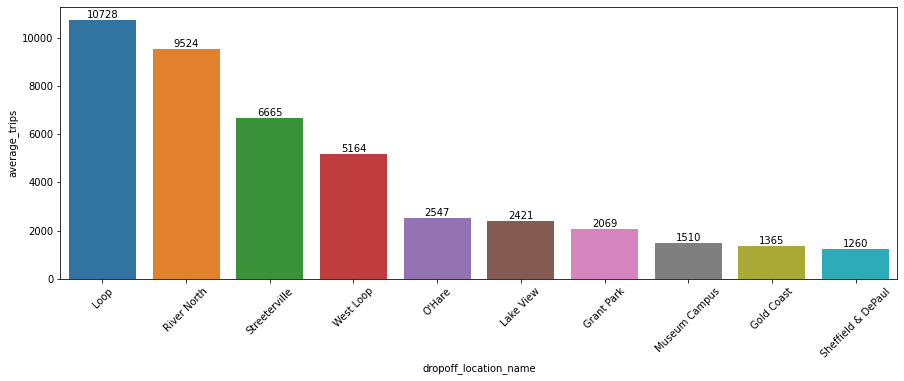

In [18]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(wspace=35)
ax = sns.barplot(data = top_ten_area, x = 'dropoff_location_name', y = 'average_trips')
plt.xticks(rotation = 45)

for i, v in enumerate(top_ten_area.sort_values(by='average_trips', ascending=False)['average_trips']):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

Grafik di atas menunjukkan kepada kita 10 wilayah teratas yang dijadikan sebagai titik pengantaran (dropoff location) dan wilayah yang paling banyak dijadikan sebagai titik pengantaran adalah **Loop** dengan rata-rata jumlah pengantaran sebanyak 10.728.
Mungkin karena wilayah ini berada di pusat kota Chicago dan merupakan salah satu area yang ramai, sehingga banyak orang yang menuju kesana dengan menggunakan taksi.

### 10 Perusahaan Teratas Berdasarkan Jumlah Pengantaran

In [19]:
top_ten_company = company_df.sort_values('trips_amount', ascending=False).head(10)
top_ten_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


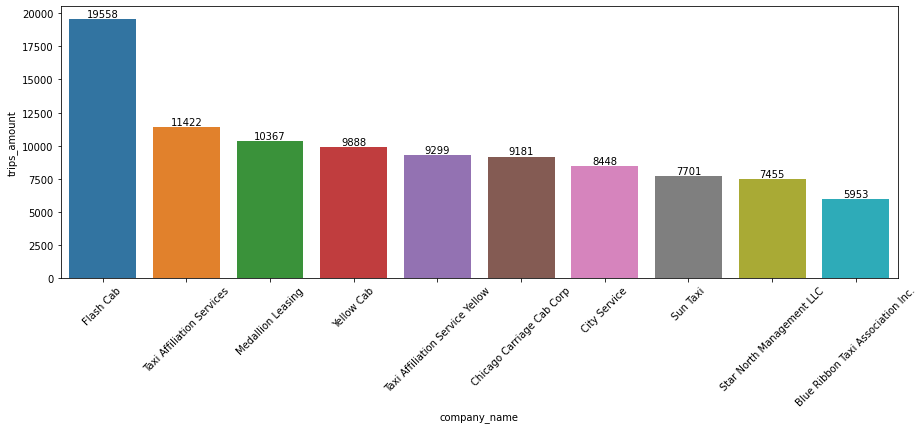

In [20]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(wspace=35)
ax = sns.barplot(data = top_ten_company, x = 'company_name', y = 'trips_amount')
plt.xticks(rotation = 45)

for i, v in enumerate(top_ten_company.sort_values(by='trips_amount', ascending=False)['trips_amount']):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

Grafik di atas menunjukkan kepada kita 10 perusahaan taksi teratas berdasarkan jumlah pengantaran dan perusahaan yang paling banyak memiliki jumlah pengantaran adalah **Flash Cab** dengan jumlah pengantaran sebanyak 19.558.

Sepertinya perusahaan taksi ini menjadi salah satu taksi favorit di Chicago karena mereka memiliki jumlah pengantaran yang cukup tinggi dibandingkan 9 perusahaan teratas lainnya. Mungkin harga argo perjalanannya cukup murah? Atau mereka dapat mengantar penumpang dengan waktu yang sangat cepat dan efisien sesuai namanya.

### Kesimpulan dan Langkah Selanjutnya

Setelah melakukan analisa data pada kedua dataset yang kita miliki, maka dapat ditarik kesimpulan:

1. Wilayah **Loop** menjadi wilayah yang paling sering dijadikan sebagai titik pengantaran terakhir di Chicago dengan jumlah rata-rata pengantaran sebanyak 10.728. Sedangkan posisi kedua ditempati oleh wilayah **River North** dengan jumlah rata-rata pengantaran sebanyak 9.524. Sepertinya, wilayah - wilayah teratas tersebut merupakan area pusat kota Chicago yang ramai. Hal ini dapat dilihat melalui grafik dimana kita sudah mengurutkan 10 wilayah teratas berdasarkan titik pengantaran.

2. Perusahaan taksi **Flash Cab** merupakan perusahaan taksi yang paling banyak jumlah pengantarannya dalam rentang waktu tanggal 15-16 November 2017, dengan total jumlah 19.558. Perusahaan taksi ini memang cukup populer, apalagi, mereka juga menawarkan layanan yang beragam, harga yang bersaing dan memberikan banyak kemudahan termasuk pengantaran ke bandara.

Dengan demikian, kita dapat melihat bahwa preferensi penumpang terhadap perjalanan adalah mereka membutuhkan perusahaan taksi yang memberikan kenyamanan bagi penumpang dengan harga yang kompetitif untuk menuju daerah - daerah pusat kota Chicago yang ramai.

## Menguji Hipotesis

Kita telah mencoba melihat wilayah teratas di Chicago yang dijadikan titik pengantaran dan juga perusahaan taksi yang teratas berdasarkan jumlah perjalanannya.

Selanjutnya, kita akan menguji hipotesis:

Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan.

**Mempersiapkan Data**

Untuk menguji hipotesis tersebut, pertama, kita memerlukan dataset baru yang telah kita kumpulkan datanya melalui situs web. Kita akan mengambil data semua perjalanan yang dimulai di **Loop** pada hari Sabtu dan berakhir di **O'Hare (bandara)** dengan kondisi cuaca untuk setiap perjalanannya.

In [21]:
new_df = pd.read_csv('/datasets/project_sql_result_07.csv')

In [22]:
new_df

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [24]:
new_df.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [25]:
new_df.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


Dataset yang kita miliki saat ini mempunyai 1068 baris dan 3 kolom dengan deskripsi sebagai berikut:

start_ts: tanggal dan waktu penjemputan

weather_conditions: kondisi cuaca saat perjalanan dimulai

duration_seconds: durasi perjalanan dalam satuan detik

Tidak ada masalah pada datasetnya, namun distribusi data kita terlihat sangat bervariatif dan memiliki banyak *outlier*. Untuk itu, sebelum melanjutkan menguji hipotesis, kita perlu membuang *outlier* tersebut terlebih dahulu.

<AxesSubplot:xlabel='weather_conditions', ylabel='duration_seconds'>

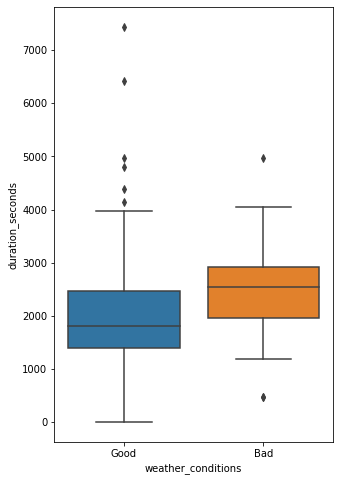

In [26]:
plt.figure(figsize = (5, 8))
sns.boxplot(data = new_df, x = 'weather_conditions', y = 'duration_seconds')

In [27]:
Q1 = new_df['duration_seconds'].quantile(0.25)
Q3 = new_df['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

if lower_whisker < 0:
    lower_whisker = 0    

In [28]:
Q1

1438.25

In [29]:
Q3

2580.0

In [30]:
IQR

1141.75

In [31]:
lower_whisker

0

In [32]:
upper_whisker

4292.625

In [33]:
new_df_no_outlier = new_df.loc[(new_df['duration_seconds'] > lower_whisker) & 
                               (new_df['duration_seconds'] < upper_whisker)]

In [34]:
new_df_no_outlier

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


<AxesSubplot:xlabel='weather_conditions', ylabel='duration_seconds'>

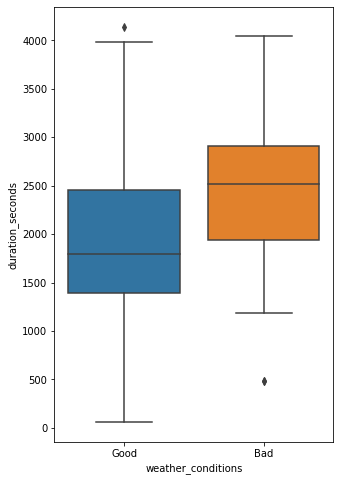

In [35]:
plt.figure(figsize = (5, 8))
sns.boxplot(data = new_df_no_outlier, x = 'weather_conditions', y = 'duration_seconds')

Saat ini, dataset baru yang kita miliki sudah lebih baik, masih terdapat *outlier* tetapi jumlahnya sangat sedikit, jadi dapat kita abaikan. Jika diperhatikan, durasi rata-rata perjalanan saat kondisi hujan jauh lebih tinggi dibandingkan jika kondisi cuaca cerah. Apakah memang kondisi cuaca berpengaruh terhadap frekuensi perjalanan?

Selanjutnya, kita akan menggunakan dataset ini untuk menguji hipotesis.

**Menguji Hipotesis**

Untuk menguji hipotesis, kita akan mencoba melakukan *ttest_ind(sample_1, sample_2)* dari paket modul *scipy.stats* dan bandingkan hasil nilai p dengan "alpha".
Nilai "alpha" atau tingkat signifikansi yang dipilih adalah sebesar 5%. Angka ini dipilih karena mempertimbangkan tujuan pengujian hipotesis dan juga konteks pengujian yaitu untuk keperluan industri transportasi yang tidak memerlukan tingkat signifikansi yang sangat rendah (seperti 0.001 atau bahkan 0.0001).
Kita akan mengasumsikan bahwa terdapat kemungkinan sebesar 5% kesalahan dalam menolak H0.

H0 : Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare pada hari-hari Sabtu yang hujan dan tidak hujan adalah sama.

H1 : Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare pada hari-hari Sabtu yang hujan dan tidak hujan berbeda. 

In [36]:
sample_1 = new_df_no_outlier.loc[new_df_no_outlier['weather_conditions'] == 'Bad', 'duration_seconds']
sample_2 = new_df_no_outlier.loc[new_df_no_outlier['weather_conditions'] != 'Bad', 'duration_seconds']

In [37]:
sample_1.mean()

2412.9441340782123

In [38]:
sample_2.mean()

1992.8072976054732

In [39]:
alpha = 0.05
results = st.ttest_ind(sample_1, sample_2, equal_var=False)
results.pvalue

2.5498530513320922e-12

In [40]:
if (results.pvalue < alpha):
    print('Tolak null hipotesis')
else:
    print('Kita gagal menolak null hipotesis')

Tolak null hipotesis


Setelah melakukan ttest_ind, hasil uji statistik menunjukkan bahwa p-value < alpha, dan hasil uji hipotesis menyatakan "Tolak null hipotesis," maka kita dapat menyimpulkan bahwa ada bukti yang cukup kuat untuk menolak hipotesis nol (H0) dan menerima hipotesis alternatif (H1) pada tingkat signifikansi yang telah ditentukan (nilai alpha = 0.05).

Sehingga bisa dikatakan bahwa terdapat perbedaan pada durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare pada hari-hari Sabtu yang hujan dan yang tidak hujan.

Maka dari itu, hipotesis awal kita yang menyatakan bahwa durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan, dapat diterima sepenuhnya.

Dengan kata lain, kondisi cuaca dapat mempengaruhi frekuensi perjalanan, karena jika terdapat perbedaan durasi rata-rata perjalanan, berarti dapat dikatakan juga terdapat perubahan durasi antara hari-hari Sabtu yang hujan dan tidak hujan.


## Kesimpulan Umum

Kita telah mencoba untuk mengolah data dan membuktikan hipotesis kita dapat diterima atau tidak.

Kumpulan data awal yang memuat informasi perjalanan taksi di Chicago terdapat pada basis data dengan terbagi dalam 5 tabel, yaitu:

    * Tabel `neighborhoods`: data terkait wilayah di kota Chicago
    * Tabel `cabs`: data terkait taksi
    * Tabel `trips`: data terkait perjalanan
    * Tabel `weather_records`: data terkait cuaca

Karena kita tidak memiliki informasi mengenai data cuaca, maka kita perlu mendapatkan informasi data cuaca di Chicago pada bulan November 2017 dari situs web: https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html.

Selanjutnya, kita memiliki tiga dataset yang akan digunakan selama penelitian ini. Ketiga dataset tersebut adalah:

    * Dataset pertama: `project_sql_result_01.csv.`
    * Dataset kedua: `project_sql_result_04.csv.`
    * Dataset ketiga: `project_sql_result_07.csv` 


Dataset pertama dan kedua digunakan untuk memahami preferensi penumpang, sedangkan dataset ketiga digunakan untuk menguji hipotesis dimana dampak faktor eksternal seperti cuaca dapat mempengaruhi frekuensi perjalanan.

Dari tahap pra-pemrosesan data, kita mendapat kesimpulan, bahwa:

1. Dataset pertama berisi informasi mengenai perjalanan dari perusahaan taksi dan dataset kedua berisi informasi rata-rata jumlah perjalanan yang berakhir di setiap wilayah tertentu.

2. Dataset pertama tidak memiliki masalah, tidak ada nilai yang hilang dan tipe data kolom sudah sesuai, namun perlu dilakukan pengecekan apakah terdapat duplikasi data atau tidak.

3. Dataset kedua juga tidak memiliki nilai yang hilang, namun tipe data untuk kolom `average_trips` tidak sesuai, sehingga diputuskan untuk diubah menjadi integer, mengingat kolom tersebut berisi rata-rata jumlah perjalanan yang tidak mungkin bernilai float.

4. Tidak ada data yang terduplikasi.

5. Dataset ketiga tidak memiliki masalah yang signifikan, namun ketika dilakukan pra-pemrosesan data pada tahap pengujian hipotesis, ditemukan banyak *outlier*, sehingga diputuskan untuk membuang *outlier* tersebut dan menggunakan data tanpa *outlier* untuk menguji hipotesis.

Setelah selesai memperbaiki data yang bermasalah, kita mencoba menganalisa data dengan melakukan beberapa langkah, yaitu:

1. Mengidentifikasi 10 wilayah teratas yang dijadikan sebagai titik pengantaran dan juga 10 perusahaan taksi teratas dan jumlah perjalanannya. 

2. Setelah dilakukan analisa dan melihat grafik dari 10 wilayah teratas, wilayah **Loop** menjadi wilayah yang paling sering dijadikan sebagai titik pengantaran terakhir di Chicago dengan jumlah rata-rata pengantaran sebanyak 10.728. Wilayah - wilayah teratas tersebut merupakan area pusat kota Chicago yang ramai. Hal ini dapat dilihat melalui grafik dimana kita sudah mengurutkan 10 wilayah teratas berdasarkan titik pengantaran.

3. Melalui grafik 10 perusahaan taksi teratas, didapatkan kesimpulan bahwa perusahaan taksi **Flash Cab** merupakan perusahaan taksi yang paling banyak jumlah pengantarannya dalam rentang waktu tanggal 15-16 November 2017, dengan total jumlah 19.558. Perusahaan taksi ini sepertinya cukup populer dibandingkan perusahaan taksi lainnya.

Dengan demikian, kita dapat melihat bahwa preferensi penumpang terhadap perjalanan adalah mereka membutuhkan perusahaan taksi yang memberikan kenyamanan bagi penumpang dengan harga yang kompetitif selama perjalanan untuk menuju daerah - daerah pusat kota Chicago yang ramai.

Pada awal proyek, kita juga telah merumuskan hipotesis sebagai berikut:

*Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan.*

Setelah menganalisis data dan melakukan uji hipotesis statistik dengan merumuskan hipotesis nol dan alternatif dan melakukan pengujian t-test, kita mendapatkan kesimpulan bahwa: terdapat perbedaan pada durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare pada hari-hari Sabtu yang hujan dan yang tidak hujan.

Sehingga, dengan kata lain, hipotesis awal kita yang menyatakan bahwa durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan, dapat diterima sepenuhnya. Karena jika terdapat perbedaan, maka sama artinya dengan adanya perubahan durasi rata-rata perjalanan yang dipengaruhi oleh kondisi cuaca, baik saat hujan maupun tidak hujan.

Dengan demikian, kita sudah menguji hipotesis kita dan menarik kesimpulan. Perusahaan Zuber dapat mempertimbangkan beberapa preferensi penumpang seperti pemilihan perusahaan taksi yang populer dan wilayah tujuan akhir yang paling banyak dituju, serta pola dimana kondisi cuaca dapat mempengaruhi frekuensi suatu perjalanan.
